In [1]:
# importar librerias
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# cargar datasets establecimentos comerciales singulares
fires_carrer =pd.read_csv(r"C:\Users\34626\Documents\TRABAJO\TALENTO DIGITAL\hackaton\fires_carrer.csv"
                            , sep=',', encoding = 'utf-16')

mercats_municipals= pd.read_csv (r"C:\Users\34626\Documents\TRABAJO\TALENTO DIGITAL\hackaton\mercats_municipals.csv"
                            , sep=',', encoding = 'utf-16')

centres_comercials = pd.read_csv(r"C:\Users\34626\Documents\TRABAJO\TALENTO DIGITAL\hackaton\centres comercials.csv"
                            , sep=',', encoding = 'utf-16')

galeries = pd.read_csv(r"C:\Users\34626\Documents\TRABAJO\TALENTO DIGITAL\hackaton\galeries_comercials.csv"
                            , sep=',', encoding = 'utf-16')

In [3]:
# recuento de establecimientos singulares por barrio
barris_fc=fires_carrer['addresses_neighborhood_id'].value_counts()
barris_fc = barris_fc.rename_axis('barri').reset_index(name='num_FC')

barris_mm=mercats_municipals['addresses_neighborhood_id'].value_counts()
barris_mm = barris_mm.rename_axis('barri').reset_index(name='num_MM')

barris_cc = centres_comercials['addresses_neighborhood_id'].value_counts()
barris_cc = barris_cc.rename_axis('barri').reset_index(name='num_CC')

barris_gc = galeries['addresses_neighborhood_id'].value_counts()
barris_gc = barris_gc.rename_axis('barri').reset_index(name='num_GC')

In [4]:
# unión de datasets
barris_fc_mm = pd.merge(barris_fc, barris_mm, on='barri', how='outer')
barris_cc_gc = pd.merge(barris_cc, barris_gc, on='barri', how='outer')

comerbarris = pd.merge(barris_fc_mm, barris_cc_gc, on='barri', how='outer')
comerbarris.head(5)

,barri,num_FC,num_MM,num_CC,num_GC
0,2,7.0,2.0,3.0,1.0
1,19,4.0,2.0,4.0,NaN
2,23,4.0,2.0,NaN,NaN
3,10,4.0,5.0,NaN,NaN
4,4,3.0,1.0,NaN,NaN


In [5]:
# cargar dataset del censo de actividad comercial
censcomers = pd.read_csv(r"C:\Users\34626\Documents\TRABAJO\TALENTO DIGITAL\hackaton\2019_censcomercialbcn_detall.csv", sep = ",")
censcomers.head(5)

,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
0,1075454,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
1,1075453,NaN,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
2,1075451,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
3,1075449,NaN,1,Actiu,3,Altres,17,Altres,1700100,Administració,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
4,1075448,NaN,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0


In [6]:
# Comprobación de los tipos de actividades únicas registradas
censcomers.Nom_Activitat.nunique()

83

In [7]:
# Listado de actividades comerciales únicas
censcomers.Nom_Activitat.unique()

array(['Serveis a les empreses i oficines', 'Activitats emmagatzematge',
       'Administració', 'Activitats de transport ', 'Vehicles',
       'Restaurants', 'Material equipament llar', 'Carn i Porc', 'Altres',
       'Peix i marisc', 'Floristeries', 'Fruites i verdures',
       'Drogueria i perfumeria', 'Vestir', 'Ous i aus',
       'Pa, pastisseria i làctics', 'Basars',
       'Plats preparats (no degustació)', 'Farmàcies PARAFARMÀCIA',
       'Ensenyament', 'Sense informació', 'Souvenirs',
       'Reparacions (Electrodomèstics i automòbils)',
       'Autoservei / Supermercat', 'Sanitat i assistència',
       'Sense informació - Havia tingut activitat (rètol)',
       'Finances i assegurances', "serveis d'allotjament",
       'Bars   / CIBERCAFÈ', 'Equipaments culturals i recreatius',
       'En reforma', 'Merceria', 'Locals buits en venda i lloguer',
       'Arts gràfiques', "Centres d'estètica", 'Calçat i pell',
       'Xocolateries / Geladeries / Degustació', 'Activitats industri

In [8]:
# Recuento por tipo de actividad comercial en la ciudad de Barcelona
censcomers.groupby('Nom_Activitat').count()

,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Codi_Activitat_2016,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
Nom_Activitat,,,,,,,,,,,,,,,,,,,,,
Activitats de la construcció,1965,1799,1965,1965,1965,1965,1965,1965,1965,1965,...,1965,1965,1965,1965,1965,1965,1965,1965,1965,1963
Activitats de transport,448,402,448,448,448,448,448,448,448,448,...,446,446,446,448,448,448,448,448,446,447
Activitats de transport i emmagatzematge,141,140,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
Activitats emmagatzematge,1442,1150,1442,1442,1442,1442,1442,1442,1442,1442,...,1438,1438,1438,1442,1442,1442,1442,1442,1438,1442
Activitats immobiliàries,950,883,950,950,950,950,950,950,950,950,...,950,950,950,950,950,950,950,950,950,949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
altres,16,12,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
serveis d'allotjament,740,654,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,739
serveis de menjar i begudes,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,87


In [9]:
# Definición de las actividades de tipo cotidiano
actQuo = ['Restaurants', 'Carn i Porc',
       'Peix i marisc', 'Floristeries', 'Fruites i verdures',
       'Drogueria i perfumeria', 'Ous i aus',
       'Pa, pastisseria i làctics', 'Basars',
       'Plats preparats (no degustació)', 'Farmàcies PARAFARMÀCIA',
       'Ensenyament', 'Autoservei / Supermercat', 'Sanitat i assistència',
       'Bars   / CIBERCAFÈ', 'Equipaments culturals i recreatius',
       'Xocolateries / Geladeries / Degustació', 'Perruqueries',
       'Tabac i articles fumadors',
       'Serveis de menjar take away MENJAR RÀPID', 'Serveis Socials',
       'Associacions', 'Gimnàs /fitnes',
       'Llibres, diaris i revistes', 'Manteniment, neteja i similars', 'Veterinaris / Mascotes',
       'Herbolaris, dietètica i NUTRICIÓ',
       'Bars especials amb actuació / Bars musicals / Discoteques /PUB', 'Begudes', 'Tintoreries', 'serveis de menjar i begudes',
       'Equipaments religiosos',
       'Locutoris']

In [10]:
# Aplicación de la clasificacion anterior al dataset
censcomers["quotidia"] = censcomers["Nom_Activitat"].apply(lambda f: f in actQuo)
censcomers_red = censcomers[["Codi_Activitat_2019", "Nom_Activitat", "Codi_Barri", "quotidia"]]

In [11]:
#Recuento total de establecimientos por barrio
activitat = censcomers_red.groupby("Codi_Barri").count()

In [12]:
#Recuento total de establecimientos COTIDIANOS por barrio
quotidia = censcomers_red[censcomers_red["quotidia"] == True].groupby(["Codi_Barri", "quotidia"]).count()
quotidia.rename(columns={'Nom_Activitat': 'True_quotidia'}, inplace=True)
quotidia.head(5)

,,Codi_Activitat_2019,True_quotidia
Codi_Barri,quotidia,,
1,True,1382,1382
2,True,863,863
3,True,409,409
4,True,897,897
5,True,544,544


In [13]:
# Resetear indices de los 2 recuentos
activitat.reset_index(inplace=True)  
quotidia.reset_index(inplace=True)

# Cálculo de la proporción de establecimientos cotidianos por barrio
activitat['True_quotidia'] = quotidia['True_quotidia']
activitat['Prop_quotidia'] = activitat.apply(lambda f: f.True_quotidia / f.quotidia, axis = 1)
activitat.head(5)

,Codi_Barri,Codi_Activitat_2019,Nom_Activitat,quotidia,True_quotidia,Prop_quotidia
0,1,2968,2968,2968,1382,0.465633
1,2,2269,2269,2269,863,0.380344
2,3,747,747,747,409,0.547523
3,4,2182,2182,2182,897,0.411091
4,5,1401,1401,1401,544,0.388294


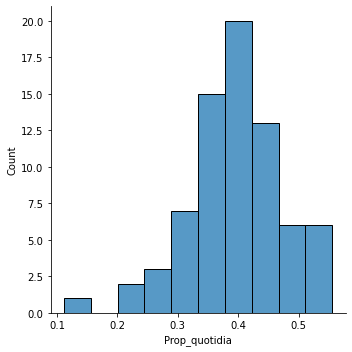

In [14]:
sns.displot(kind="hist", data=activitat, x="Prop_quotidia", bins=10);

In [15]:
# Binarización de la proporción de establecimientos cotidianos con corte cercano a la media
def binarizador(quotidia):
    if quotidia["Prop_quotidia"] >= 0.4:
        return 1
    else: 
        return 0

activitat['Bin_quotidia'] = activitat.apply(binarizador, axis=1)
activitat.head(5)

,Codi_Barri,Codi_Activitat_2019,Nom_Activitat,quotidia,True_quotidia,Prop_quotidia,Bin_quotidia
0,1,2968,2968,2968,1382,0.465633,1
1,2,2269,2269,2269,863,0.380344,0
2,3,747,747,747,409,0.547523,1
3,4,2182,2182,2182,897,0.411091,1
4,5,1401,1401,1401,544,0.388294,0


In [16]:
# Con esto ya tenemos construida la variable binarizada de establecimientos cotidianos
activitat['Bin_quotidia'].value_counts()

0    37
1    36
Name: Bin_quotidia, dtype: int64

In [17]:
# Construcción de la variable de diversidad comercial por barrio
n_actividades = censcomers_red.groupby("Codi_Barri")["Nom_Activitat"].nunique()
activitat['n_actividades'] = activitat['Codi_Barri'].map(n_actividades)
activitat['Prop_actividades'] = activitat['n_actividades'].apply(lambda f: f/83)
activitat.head(5)

,Codi_Barri,Codi_Activitat_2019,Nom_Activitat,quotidia,True_quotidia,Prop_quotidia,Bin_quotidia,n_actividades,Prop_actividades
0,1,2968,2968,2968,1382,0.465633,1,73,0.879518
1,2,2269,2269,2269,863,0.380344,0,72,0.867470
2,3,747,747,747,409,0.547523,1,64,0.771084
3,4,2182,2182,2182,897,0.411091,1,74,0.891566
4,5,1401,1401,1401,544,0.388294,0,75,0.903614


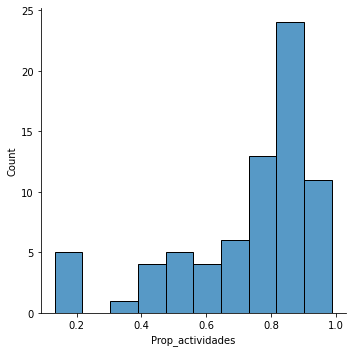

In [18]:
sns.displot(kind="hist", data=activitat, x="Prop_actividades", bins=10);

In [19]:
# Binarización de la diversidad de establecimientos comerciales con corte cercano a la media
def binarizador(acti):
    if acti["Prop_actividades"] >= 0.8:
        return 1
    else: 
        return 0

activitat['Bin_actividades'] = activitat.apply(binarizador, axis=1)
activitat.head(5)

,Codi_Barri,Codi_Activitat_2019,Nom_Activitat,quotidia,True_quotidia,Prop_quotidia,Bin_quotidia,n_actividades,Prop_actividades,Bin_actividades
0,1,2968,2968,2968,1382,0.465633,1,73,0.879518,1
1,2,2269,2269,2269,863,0.380344,0,72,0.867470,1
2,3,747,747,747,409,0.547523,1,64,0.771084,0
3,4,2182,2182,2182,897,0.411091,1,74,0.891566,1
4,5,1401,1401,1401,544,0.388294,0,75,0.903614,1


In [20]:
# Eliminación de las columnas no útiles 
activitat = activitat[['Codi_Barri','Bin_quotidia','Bin_actividades']]
activitat.head(5)

,Codi_Barri,Bin_quotidia,Bin_actividades
0,1,1,1
1,2,0,1
2,3,1,0
3,4,1,1
4,5,0,1


In [21]:
# Unión de los dos datasets
activitat.rename(columns={'Codi_Barri' : 'barri'}, inplace=True)
comersLocal = pd.merge(activitat, comerbarris, on='barri', how='outer')
comersLocal.head(5)

,barri,Bin_quotidia,Bin_actividades,num_FC,num_MM,num_CC,num_GC
0,1,1,1,2.0,1.0,NaN,NaN
1,2,0,1,7.0,2.0,3.0,1.0
2,3,1,0,1.0,1.0,NaN,NaN
3,4,1,1,3.0,1.0,NaN,NaN
4,5,0,1,2.0,3.0,NaN,NaN


In [22]:
# Preparación para binarizar de las columnas pendientes
comersLocal['num_FC'].fillna(0,inplace=True)
comersLocal['num_MM'].fillna(0,inplace=True)
comersLocal['num_GC'].fillna(0,inplace=True)
comersLocal.head(5)

,barri,Bin_quotidia,Bin_actividades,num_FC,num_MM,num_CC,num_GC
0,1,1,1,2.0,1.0,NaN,0.0
1,2,0,1,7.0,2.0,3.0,1.0
2,3,1,0,1.0,1.0,NaN,0.0
3,4,1,1,3.0,1.0,NaN,0.0
4,5,0,1,2.0,3.0,NaN,0.0


In [23]:
# Binarización de columnas, excepto Centros Comerciales, que se puntuan a la inversa
def unificador(x):
    if x> 0:
        return 1  
    else:
        return 0
    
comersLocal['fires']=comersLocal['num_FC'].apply(unificador)
comersLocal['mercats']=comersLocal['num_MM'].apply(unificador)
comersLocal['galeries']=comersLocal['num_GC'].apply(unificador)

In [24]:
# Binarizaciónde la columna centro comercial
def zerificador(x):
    if x> 0:
        return 0 
    else:
        return 1
    
comersLocal['centres']=comersLocal['num_CC'].apply(zerificador)
comersLocal.head(5)

,barri,Bin_quotidia,Bin_actividades,num_FC,num_MM,num_CC,num_GC,fires,mercats,galeries,centres
0,1,1,1,2.0,1.0,NaN,0.0,1,1,0,1
1,2,0,1,7.0,2.0,3.0,1.0,1,1,1,0
2,3,1,0,1.0,1.0,NaN,0.0,1,1,0,1
3,4,1,1,3.0,1.0,NaN,0.0,1,1,0,1
4,5,0,1,2.0,3.0,NaN,0.0,1,1,0,1


In [25]:
# Eliminación de columnas no útiles
comersLocal.drop(columns=['num_FC','num_MM','num_CC','num_GC'], inplace=True)
comersLocal.rename(columns={'Bin_quotidia':'quotidia','Bin_actividades':'variacio'}, inplace=True)
comersLocal.head(5)

,barri,quotidia,variacio,fires,mercats,galeries,centres
0,1,1,1,1,1,0,1
1,2,0,1,1,1,1,0
2,3,1,0,1,1,0,1
3,4,1,1,1,1,0,1
4,5,0,1,1,1,0,1


In [26]:
# Cálculo para la columna índice síntetico de comercio de proximidad con rango 0-10 (score)
comersLocal['score'] = comersLocal.apply(lambda f: f.fires + f.mercats + f.centres +
                    f.galeries + (f.variacio*2) + (f.quotidia*4), axis=1)
comersLocal.head(5)

,barri,quotidia,variacio,fires,mercats,galeries,centres,score
0,1,1,1,1,1,0,1,9
1,2,0,1,1,1,1,0,5
2,3,1,0,1,1,0,1,7
3,4,1,1,1,1,0,1,9
4,5,0,1,1,1,0,1,5


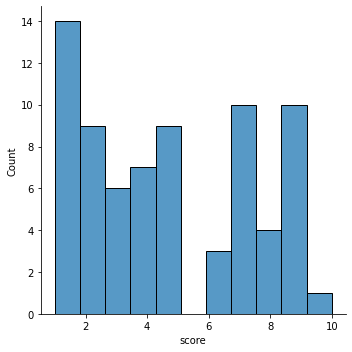

In [27]:
sns.displot(kind="hist", data=comersLocal, x="score", bins=11);

In [28]:
# Añadir la columna con el nombre de los barrios que es necesario para el frontend
llista_codi = censcomers['Codi_Barri'].unique()
llista_nom = censcomers['Nom_Barri'].unique()
llistes = [llista_codi, llista_nom]
barris = pd.DataFrame(llistes)
barris = barris.T
barris = barris.sort_values(0).reset_index()

comersLocal['nomBarri'] = barris[1]
comersLocal.head(5)

,barri,quotidia,variacio,fires,mercats,galeries,centres,score,nomBarri
0,1,1,1,1,1,0,1,9,el Raval
1,2,0,1,1,1,1,0,5,el Barri Gòtic
2,3,1,0,1,1,0,1,7,la Barceloneta
3,4,1,1,1,1,0,1,9,"Sant Pere, Santa Caterina i la Ribera"
4,5,0,1,1,1,0,1,5,el Fort Pienc


In [29]:
# Exportamos los archivos para backend y frontend
comersLocal.to_csv('comersLocal.csv')
comersLocal.to_json('comersLocal.json')